# CSMODEL S11 | Project Phase 1
This notebook is the work of, Group 4, consisting of the following members:

* CARNEY, JOHN PAUL COMPANIA
* GUERRRERO, MIGUEL ALFONSO DAVID
* REINANTE, CHRISTIAN VICTOR GO
* SALVADOR, JARYLL FRANCIS PENA

## Dataset Description
This project makes use of the [Online Gaming Anxiety Data Set](https://www.kaggle.com/datasets/divyansh22/online-gaming-anxiety-data). It contains responses gathered from a worldwide survey of gamers. Included in this survey are psychological assessments for anxiety, social phobia, and life satisfaction. It also gathered demographic and gaming-related information. Marian Sauter and Dejan Draschkow originally compiled the data.


## Importing Libraries
Before proceeding, we will import the necessary libraries which we will use to provide a general overview of the dataset.

In [10]:
import numpy as np
import pandas as pd

## Importing Libraries
We then load the dataset as follows:

In [11]:
import numpy as np
import pandas as pd

gamingAnxiety_df = pd.read_csv("GamingStudy_data.csv")
gamingAnxiety_df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 599: invalid start byte

## Process and Implications of Data Collection
The data was gathered by means of a survey that was distributed to gamers globally. The survey had a range of inquiries commonly employed by psychologists to assess levels of anxiety, social phobia, and life satisfaction. Standardized psychological assessment instruments, including the General Anxiety Disorder Assessment (GAD), Satisfaction with Life Scale (SWL), and Social Phobia Inventory (SPIN) questionnaires, and inquiries regarding gaming habits and general demographics were included in the survey. 

Though not explicitly mentioned, it is extremely likely that this survey was conducted online, given that online surveys are commonly used when reaching a worldwide audience, especially gamers. The dataset description also includes *Reddit* as an example for the **Reference** variable, indicating the website was used as an avenue to conduct the survey as well. Assuming the data was collected as such, this presents several implications:

- **Sample Composition**: Because the data was collected through an online survey, it may over-represent individuals active in online gaming communities or gamers who primarily play online multiplayer games. As a result, those who do not regularly use the internet, are inactive in online gaming communities, or those who play single-player games exclusively may be underrepresented.

- **Voluntary Response Bias**: The data relies on self-reported responses, which can be subject to biases such as inaccurate self-assessment by the respondent or social desirability bias. Respondents with stronger views also may have been more likely to participate in the first place because of this.

**Each row** represents a single survey response from a gamer, and **each column** represents a variable collected in the survey. The dataset contains **13464 observations** in total, and there are **55 variables** in the dataset. We can verify this, and also check each individual variable using the info() method:

In [ ]:
gamingAnxiety_df.info()

#### Demographic Information

- **S. No.:** Serial Number.  
- **Timestamp:** Time at which the participant took the questionnaire after it being launched.  
- **Gender:** Self-identified gender of the gamer taking the questionnaire.  
- **Age:** Self-reported age of the gamer taking the questionnaire.  
- **Work:** Work status of the gamer.  
- **Degree:** Highest degree attained.  
- **Birthplace:** Birthplace.  
- **Residence:** Place where the gamer currently resides.  
- **Residence_ISO3:** Current residence in ISO3 format.  
- **Birthplace_ISO3:** Birthplace in I
- **Accept:**OAccept terms and conditions (not necessary for any analysis).3 format.  

#### Psychological Assessment

- **GAD1 to GAD7:** Responses to GAD questions 1 to 7.  
- **GADE:** Effect of gaming on work.  
- **SWL1 to SWL5:** Responses to SWL questions 1 to 5.  
- **SPIN1 to SPIN17:** Responses to SPIN questions 1 to 17.  
- **Narcissism:** Interest scale in the game (1-5).  
- **GAD_T:** GAD Total Score.  
- **SWL_T:** SWL Total Score.  
- **SPIN_T:** SPIN Total Score.  

#### Gaming Habits

- **Game:** Name of the game they play.  
- **Platform:** Mode of game playing (PC, Console, Mobile, etc.).  
- **Hours:** Number of hours in a week devoted to playing.  
- **earnings:** Earnings from the game (if any).  
- **whyplay:** Reason to play the game.  
- **League:** League.  
- **highestleague:** Highest league.  
- **streams:** - Number of online streaming sessi


## Data Cleaning (WIP)
- focus on pyscho stats

In [ ]:
for column in gamingAnxiety_df.columns:
    unique_values = gamingAnxiety_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


check for columns with null

In [ ]:
nan_variables = gamingAnxiety_df.columns[gamingAnxiety_df.isnull().any()].tolist()
gamingAnxiety_df[nan_variables].isnull().sum()

test mean imputation, very small % of total rows are imputed (exclude non numeric)
all columns except degree >5%

In [ ]:

columns_to_impute = ['Hours', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 
                     'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 
                     'SPIN16', 'SPIN17', 'Narcissism', 'SPIN_T']

for column in columns_to_impute:
    gamingAnxiety_df[column] = gamingAnxiety_df[column].fillna(gamingAnxiety_df[column].mean())


In [ ]:
gamingAnxiety_df[nan_variables].isnull().sum()

IMPUTATION FOR CATEGORICAL DATA USING MODE
mayeb try probabablistic imputation?

In [ ]:
columns_to_impute = ['GADE', 'Work', 'Degree', 'Reference', 'Residence_ISO3', 'Birthplace_ISO3']

for column in columns_to_impute:
    mode_value = gamingAnxiety_df[column].mode().iloc[0]

    gamingAnxiety_df[column] = gamingAnxiety_df[column].fillna(mode_value)

In [ ]:
gamingAnxiety_df[nan_variables].isnull().sum()

## Exploratory Data Analysis
Well now perform exploratory data analysis comprehensively to gain a good understanding of our dataset:


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with the specified encoding
file_path = "GamingStudy_data.csv"  # Update with your file path
gamingAnxiety_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
gamingAnxiety_df.head()


In [ ]:
# Descriptive statistics for numerical columns
print(gamingAnxiety_df.describe())


## EXPLORATORY DATA ANALYSIS
Well now use exploratory data anlaysis to further explain the data we've chosen

## Distribution of Key Psychological Measures


In [ ]:
# Set up the figure
plt.figure(figsize=(15, 5))

# GAD Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(gamingAnxiety_df['GAD_T'], kde=True, bins=30)
plt.title('Distribution of Anxiety Scores (GAD_T)')
plt.xlabel('Anxiety Score')
plt.ylabel('Frequency')

# SWL Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(gamingAnxiety_df['SWL_T'], kde=True, bins=30)
plt.title('Distribution of Life Satisfaction Scores (SWL_T)')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frequency')

# SPIN Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(gamingAnxiety_df['SPIN_T'], kde=True, bins=30)
plt.title('Distribution of Social Phobia Scores (SPIN_T)')
plt.xlabel('Social Phobia Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Correlation Analysis
Correlation of Gaming Hours per Week with Anxiety, Life Satisfaction, and Social Phobia Scores

In [ ]:
# Scatter plots to visualize the relationships
plt.figure(figsize=(15, 5))

# Gaming Hours vs Anxiety
plt.subplot(1, 3, 1)
sns.scatterplot(x='Hours', y='GAD_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Anxiety Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Anxiety Score')

# Gaming Hours vs Life Satisfaction
plt.subplot(1, 3, 2)
sns.scatterplot(x='Hours', y='SWL_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Life Satisfaction Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Life Satisfaction Score')

# Gaming Hours vs Social Phobia
plt.subplot(1, 3, 3)
sns.scatterplot(x='Hours', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Gaming Hours per Week vs Social Phobia Scores')
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Social Phobia Score')

plt.tight_layout()
plt.show()



## Conclusion for correlation
From the analysis, you can conclude that there is no significant relationship between the amount of time spent gaming per week and the psychological measures (anxiety, life satisfaction, social phobia). The correlation coefficients are very close to zero, indicating that gaming hours do not have a meaningful impact on these psychological aspects in the surveyed population.

## Demographic breakdown (age, gender, nationality) of Gamers

In [ ]:
# Age distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(gamingAnxiety_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=gamingAnxiety_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Nationality distribution (top 10 nationalities)
plt.subplot(1, 3, 3)
top_nationalities = gamingAnxiety_df['Birthplace'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Relationship Between Preferred Gaming Device, Game Genre, and Psychological Measures

In [ ]:
# Preferred gaming device and psychological measures
plt.figure(figsize=(15, 10))

# Device vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Platform', y='GAD_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Anxiety Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Anxiety Score')

# Device vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Platform', y='SWL_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Life Satisfaction Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Life Satisfaction Score')

# Device vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Platform', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Preferred Gaming Device vs Social Phobia Scores')
plt.xlabel('Gaming Device')
plt.ylabel('Social Phobia Score')

plt.tight_layout()
plt.show()

# Game genre and psychological measures
plt.figure(figsize=(15, 10))

# Genre vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Game', y='GAD_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Anxiety Scores')
plt.xlabel('Game Genre')
plt.ylabel('Anxiety Score')
plt.xticks(rotation=45)

# Genre vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Game', y='SWL_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Life Satisfaction Scores')
plt.xlabel('Game Genre')
plt.ylabel('Life Satisfaction Score')
plt.xticks(rotation=45)

# Genre vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Game', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Social Phobia Scores')
plt.xlabel('Game Genre')
plt.ylabel('Social Phobia Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## RESEARCH QUESTION
After going through the Exploratory Data Analysis we have thought of a research question.

Does anxiety, life satisfaction and social phobia have correlations with the game genre the person is playing?

## Significance
We would like to see the correlation of data when it comes to anxiety, life satisfaction, and social phobia when it comes to the game genre. We would like to understand this for a couple of reasons.

1. Mental Health Awareness :  Identifying the potential impact of certain games on mental health can help people veer away from game genres that will worsen their conditions. For example, we wouldn't want an anxious person playing a game that would make them more anxious.
2. Game Design : A supporting reason is that game designers could design games that could lessen anxiety, raise life satisfaction and lessen social phobia through games. Sort of a therapeutic experience through gaming.
3. Academic Research : As the research has data and statistics backing it up, this could help in to contribute to the broader field of psychology and behavioral studies, providing insights into how modern technology and entertainment affect mental health.

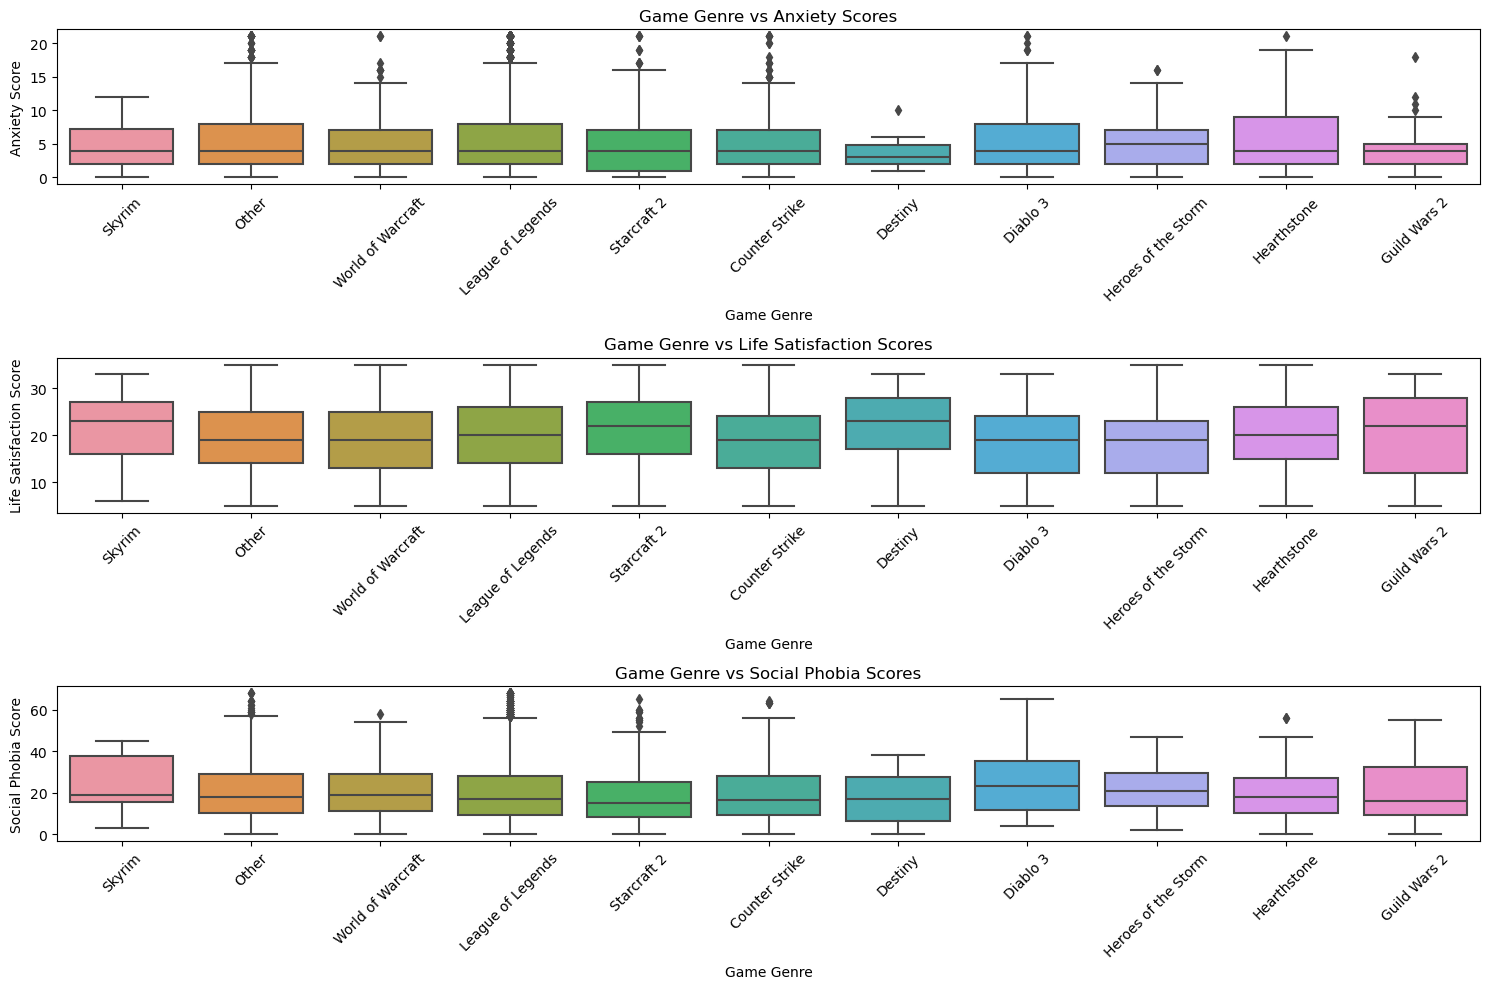

In [14]:
plt.figure(figsize=(15, 10))

# Genre vs Anxiety
plt.subplot(3, 1, 1)
sns.boxplot(x='Game', y='GAD_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Anxiety Scores')
plt.xlabel('Game Genre')
plt.ylabel('Anxiety Score')
plt.xticks(rotation=45)

# Genre vs Life Satisfaction
plt.subplot(3, 1, 2)
sns.boxplot(x='Game', y='SWL_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Life Satisfaction Scores')
plt.xlabel('Game Genre')
plt.ylabel('Life Satisfaction Score')
plt.xticks(rotation=45)

# Genre vs Social Phobia
plt.subplot(3, 1, 3)
sns.boxplot(x='Game', y='SPIN_T', data=gamingAnxiety_df)
plt.title('Game Genre vs Social Phobia Scores')
plt.xlabel('Game Genre')
plt.ylabel('Social Phobia Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
